## 설문조사 결과 분석
1. 통계치 확인
2. 역코딩
3. 신뢰도 계산
4. 타당도계산  
[reference1](https://learnx.tistory.com/entry/SPSS%EC%97%90%EC%84%9C-%EC%9A%94%EC%9D%B8%EB%B6%84%EC%84%9D%EC%9C%BC%EB%A1%9C-%ED%83%80%EB%8B%B9%EB%8F%84-%EC%B8%A1%EC%A0%95%ED%95%98%EA%B8%B0%ED%83%90%EC%83%89%EC%A0%81-%EC%9A%94%EC%9D%B8%EB%B6%84%EC%84%9D)  
[reference2](https://dr-harveychoi.tistory.com/25?category=928987)  
5. 집단간 설문결과 비교

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  ##warning sign 출력 무시
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ##scientific notation 삭제
plt.rcParams['font.family'] = 'Malgun Gothic'  ##한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False    ##마이너스기호 깨짐 방지

In [3]:
df = pd.read_excel('예제데이터/예제_학생만족도조사.xlsx')
df.head()

,gijunYear,gaeinNo,ques1,ques2,ques3,ques4,ques5,ques6,ques7,ques8,ques9,ques10,ques11,ques12,ques13,ques14,ques15,ques16,ques17,ques18Text
0,2021,2021099334,5,5,5,5,5,4,4,5,5,5,0,3,4,5,4,4,5,
1,2021,2021099125,3,3,3,3,3,3,3,3,3,3,0,2,2,2,2,4,3,
2,2021,2021098713,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,
3,2021,2021098040,4,4,5,4,3,5,4,4,5,3,0,1,3,2,2,4,2,
4,2021,2021097938,4,4,4,4,4,4,4,4,4,4,0,2,2,4,4,4,4,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10191 entries, 0 to 10190
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gijunYear   10191 non-null  int64 
 1   gaeinNo     10191 non-null  int64 
 2   ques1       10191 non-null  int64 
 3   ques2       10191 non-null  int64 
 4   ques3       10191 non-null  int64 
 5   ques4       10191 non-null  int64 
 6   ques5       10191 non-null  int64 
 7   ques6       10191 non-null  int64 
 8   ques7       10191 non-null  int64 
 9   ques8       10191 non-null  int64 
 10  ques9       10191 non-null  int64 
 11  ques10      10191 non-null  int64 
 12  ques11      10191 non-null  int64 
 13  ques12      10191 non-null  int64 
 14  ques13      10191 non-null  int64 
 15  ques14      10191 non-null  int64 
 16  ques15      10191 non-null  int64 
 17  ques16      10191 non-null  int64 
 18  ques17      10191 non-null  int64 
 19  ques18Text  10191 non-null  object
dtypes: int

In [55]:
## 학생정보 가져와서 join
df_student = pd.read_excel('예제데이터/2021학생정보.xlsx')

In [56]:
df_merge = df.merge(df_student, how = 'left', left_on = 'gaeinNo', right_on = 'hakbun')

# 빈도분석
수집한 데이터의 통계량(평균/표준편차/중위수/왜도) 등을 확인하여 응답자의 전체적인 경향을 파악한다.

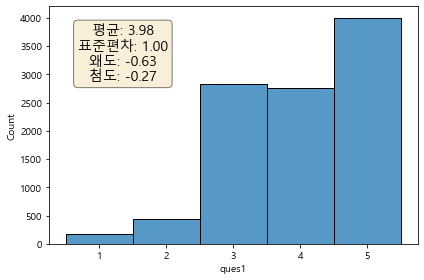

In [19]:
def 통계량그래프(df, col:str, title = None): ## df: 확인하고 싶은 데이터, col: 확인할 변수명, title: 그래프에 넣을 제목
    ax = sns.histplot(data = df, x = col, discrete = True)
    textstr = '\n'.join((
        '평균: %.2f' %(np.mean(df[col])),
        '표준편차: %.2f' %(np.std(df[col])),
        '왜도: %.2f' %(scipy.stats.skew(df[col])),
        '첨도: %.2f' %(scipy.stats.kurtosis(df[col]))
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.2, 0.8, textstr, fontsize = 14, horizontalalignment = 'center', 
             verticalalignment = 'center', transform = ax.transAxes, bbox = props)
    if title != None:
        ax.set_title(title)
    else:
        pass
    plt.tight_layout()
    plt.show()
    
통계량그래프(df, 'ques1')

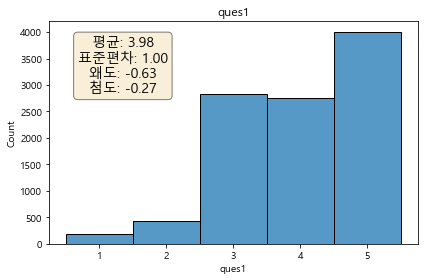

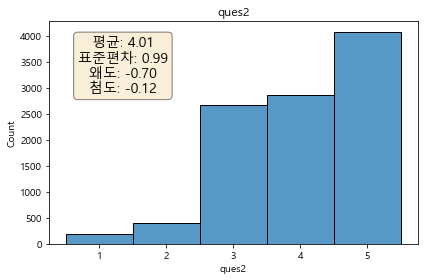

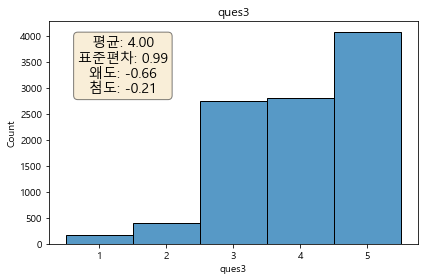

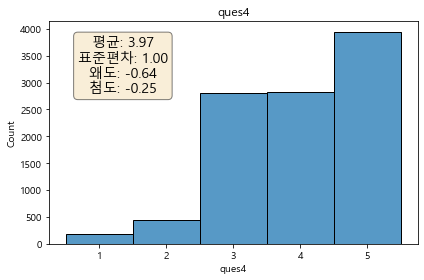

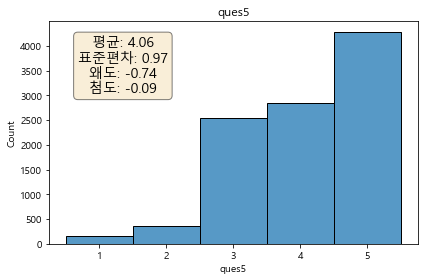

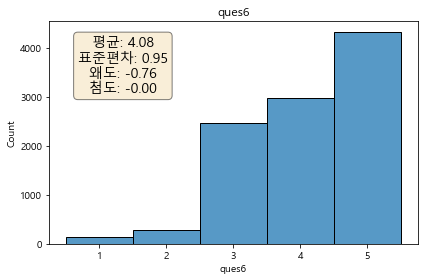

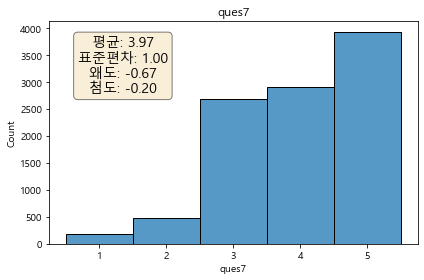

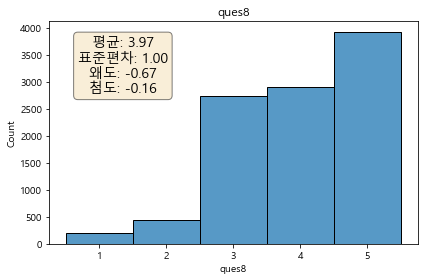

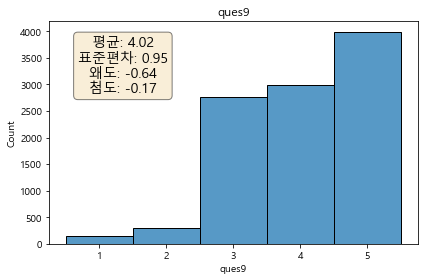

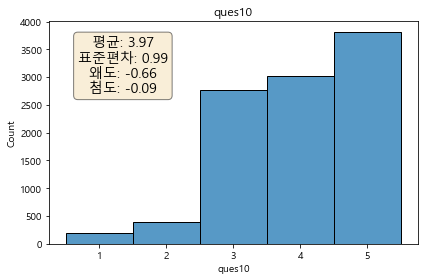

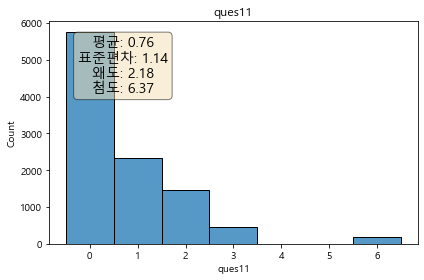

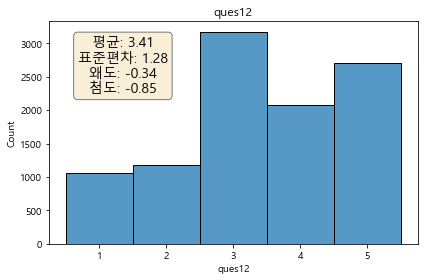

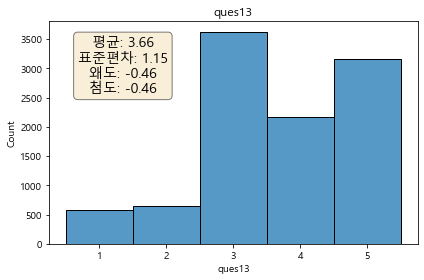

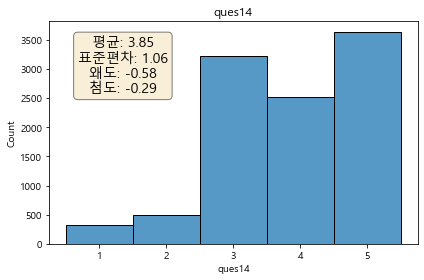

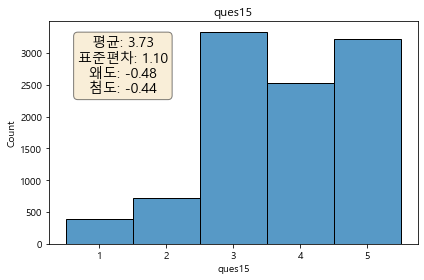

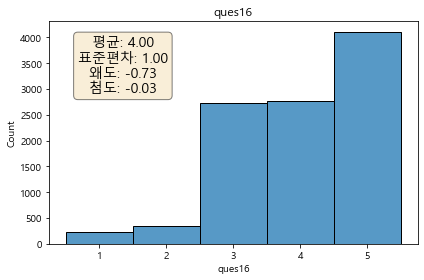

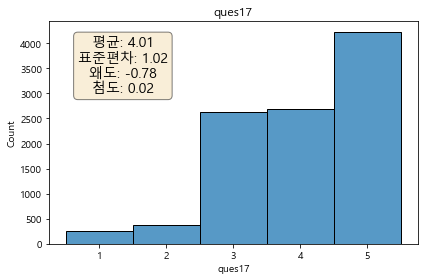

In [20]:
## for문으로 원하는 column의 분포를 한번에 출력하기
for col in df.iloc[:, 2:19].columns:
    통계량그래프(df, col, col)

# 역코딩


In [21]:
def 역코딩(df, x, 척도개수 = 5):  ## df = 역코딩할 데이터, x = 역코딩하고 싶은 변수 이름 (2개 이상일 시 리스트 형태로 작성), 척도개수 = 응답 척도의 개수
    df[x] = df[x].apply(lambda x: abs(x - 척도개수 - 1))

In [22]:
### 역코딩을 적용하려면 아래 코드를 입력
역코딩(df, 'ques1', 5)

In [23]:
df.head()

,gijunYear,gaeinNo,ques1,ques2,ques3,ques4,ques5,ques6,ques7,ques8,ques9,ques10,ques11,ques12,ques13,ques14,ques15,ques16,ques17,ques18Text
0,2021,2021099334,1,5,5,5,5,4,4,5,5,5,0,3,4,5,4,4,5,
1,2021,2021099125,3,3,3,3,3,3,3,3,3,3,0,2,2,2,2,4,3,
2,2021,2021098713,1,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,
3,2021,2021098040,2,4,5,4,3,5,4,4,5,3,0,1,3,2,2,4,2,
4,2021,2021097938,2,4,4,4,4,4,4,4,4,4,0,2,2,4,4,4,4,


# 응답항목의 신뢰도 파악하기
- 신뢰도: 동일한 시행을 반복했을 때 비슷한 결과치가 나올 가능성 (신뢰도 95%는 표본오차 내의 결과가 나올 횟수가 95번이라는 의미이다)
- 타당도: 조사결과가 참값에 얼마나 가까운지 보여주는 값 (정확도)  
  
### 1. 상관관계 그래프 그리기

In [9]:
def 상관그래프(data):
    data_corr = data.corr()
    fig, ax = plt.subplots(figsize = (10,8))
    mask = np.triu(np.ones_like(data_corr, dtype = np.bool))

    mask = mask[1:,:-1]
    corr = data_corr.iloc[1:,:-1].copy()

    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',vmin=-1, vmax=1, cbar_kws={"shrink": .8})
    plt.yticks(rotation = 0)
    plt.show()

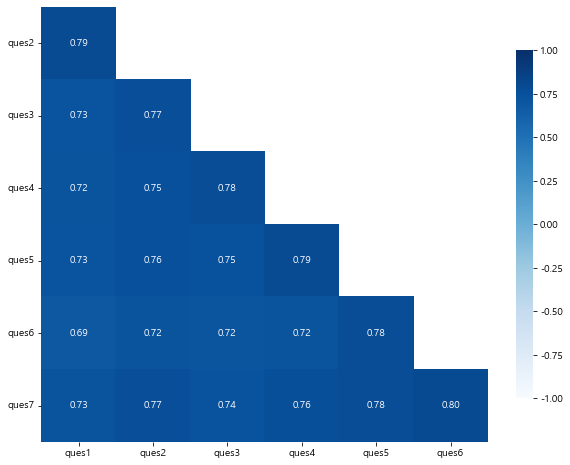

In [36]:
상관그래프(df[['ques1', 'ques2', 'ques3', 'ques4', 'ques5', 'ques6', 'ques7']])

### 2. 내적신뢰도 계산하기 (크론바흐 알파계수)

In [7]:
from pingouin import cronbach_alpha
## 예시
cronbach_alpha(df[['ques1', 'ques2', 'ques3', 'ques4', 'ques5', 'ques6', 'ques7']])

(0.9546515150363116, array([0.953, 0.956]))

In [34]:
from pingouin import cronbach_alpha
def 신뢰도계산(data):
    for col in data.columns:
        cols = data.columns.to_list()
        cols.remove(col)
        print('%s를 제외한 크론바흐 알파 계수'%col)
        print(cronbach_alpha(data[cols]))
        print('-------------------------------------')

In [35]:
## 전공 관련 문항에 대한 신뢰도 확인하기
신뢰도계산(df[['ques1', 'ques2', 'ques3', 'ques4', 'ques5', 'ques6', 'ques7']])

ques1를 제외한 크론바흐 알파 계수
(0.949550162657125, array([0.948, 0.951]))
-------------------------------------
ques2를 제외한 크론바흐 알파 계수
(0.9465644150658095, array([0.945, 0.948]))
-------------------------------------
ques3를 제외한 크론바흐 알파 계수
(0.9479444117704046, array([0.946, 0.949]))
-------------------------------------
ques4를 제외한 크론바흐 알파 계수
(0.9470674311125362, array([0.945, 0.949]))
-------------------------------------
ques5를 제외한 크론바흐 알파 계수
(0.9460958158551358, array([0.944, 0.948]))
-------------------------------------
ques6를 제외한 크론바흐 알파 계수
(0.9488372454316503, array([0.947, 0.95 ]))
-------------------------------------
ques7를 제외한 크론바흐 알파 계수
(0.946320357168616, array([0.945, 0.948]))
-------------------------------------


# 응답항목의 타당도 파악하기
- 측정하고자 하는 개념을 정확히 파악할 수 있는 문항을 사용했는지 확인하는 것이 타당도검사이다
- 타당성은 전문가의 의견이 중요하나, 통계적으로는 '탐색적 요인분석'과 '확인적 요인분석'을 통해 확인할 수 있다
- 설문조사 문항 중에는 좋지 않은 문항이 섞여있거나, 응답자들의 오해로 응답과정 상 문제가 있었을 가능성이 존재한다  
    이렇게 좋지 않은 문항을 걸러내는 것이 __요인분석__ 이다  
      
### 1. 탐색적 요인분석(Exploratory Factor Analysis; EFA)  
- 탐색적 요인분석은 요인의 수(잠재변인의 수)를 미리 정하지 않고 분석을 수행한다
- 추정방법(Estimation Method)
    - 최대우도 (ML)
        - 수집된 자료의 대상이 표본이라고 가정
        - 관찰변수들이 정규분포형태라고 가정
        - Heywood case가 생길 수 있음 (추정분산이 음수가 되는 경우)
    - 주축요인분해 (Principal Axis Factoring)
        - 수집된 자료의 대상이 모집단이라고 가정
        - 모집단으로 가정하는 경우 결과의 신뢰성이 낮아지기 때문에 ML 방법을 더 선호
- 회전방법(Rotation)  
    : 분석결과가 해석 가능하도록 요인행렬을 좌표계에 새롭게 위치시키는 것
    - 직교회전 (Orthogonal Rotation)
        - 요인간 상관성이 없다고 가정
        - 'varmax', 'quartimax'
    - 사각회전 (Oblique Rotation)
        - 요인간 상관성이 있다고 가정
        - 일반적인 사회과학 케이스에서 요인간 상관성이 언제나 존재하기 때문에 사각회전이 권장됨
        - 'direct oblimin', 'promax'

Step1. 설문조사 데이터가 요인분석을 하기에 적절한 데이터인지 확인한다 
- 등간척도, 정규성, 독립성, 등분산성을 만족해야 함
- bartlett 검정이 기각되어야 함
    - H0: 본 데이터가 요인분석에 적절하지 않다
- KMO(Kaiser-Meyer-Olkin)검정
    - 관측된 모든 변수의 분산 비율을 추정
    - H0: 모상관행렬이 단위행렬이다 (해당 가설이 기각되어야 요인분석이 가능함)
    - 0.6 이상은 보통, 0.8이상은 양호한 것으로 봄
    - 변수가 최소한 3개 이상이어야만 수행 가능
- 변수간에 높은 상관관계가 있어야 함

(1) Bartlett 테스트 
- 아래 예시에서는 p-value가 0으로 요인분석에 적합한 데이터라고 볼 수 있다

In [58]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(df.iloc[:, 2:19])
print(p_value)

0.0


(2) KMO 검정
- KMO값이 0.6 이상이면 요인분석을 수행하는 데 적합한 것으로 본다 

In [59]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df.iloc[:,2:19])
kmo_model

0.9624614238304747

Step2. 요인의 수 결정하기
- 요인 개수에 따른 Eigenvalue값을 나타낸 그래프에서 Eigenvalue값이 1 이상일 때까지 or 그래프 기울기가 완만해질 때까지 나누어야 결함을 최소화할 수 있음
- 아래 예시에서는 3개 또는 4개 정도로 나누는 것이 적절함

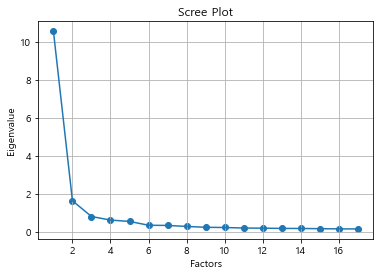

In [63]:
fa = FactorAnalyzer(n_factors = 20, rotation = None)
fa.fit(df.iloc[:,2:19])
ev,v = fa.get_eigenvalues()

plt.scatter(range(1, df.iloc[:,2:19].shape[1] + 1), ev)
plt.plot(range(1, df.iloc[:,2:19].shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Step3. 요인분석 수행 및 요인적재량 확인

<AxesSubplot:>

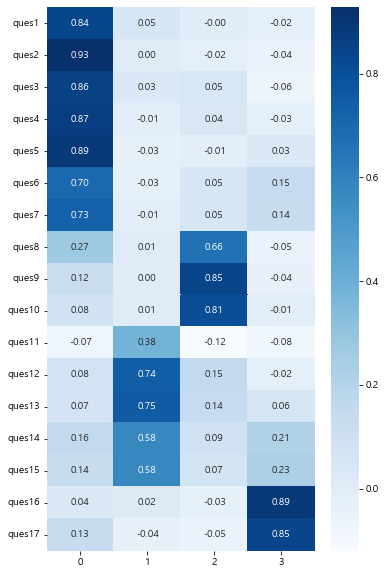

In [64]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors = 4, method = 'ml', rotation = 'promax') 
fa.fit(df.iloc[:,2:19])

efa_result = pd.DataFrame(fa.loadings_, index = df.iloc[:,2:19].columns)

plt.figure(figsize = (6, 10))
sns.heatmap(efa_result, cmap = 'Blues', annot = True, fmt = '.2f')

### 2. 확인적 요인분석(Confirmatory Factor Analysis; CFA)
- 확인적 요인분석은 선행연구 및 이론을 바탕으로 미리 요인의 수를 결정하고 분석을 진행한다

In [68]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)    

model_dict = {"F1": ["ques1", "ques2", "ques3", "ques4", 'ques5', 'ques6', 'ques7'], "F2": ["ques8", "ques9", "ques10"], "F3":["ques11", "ques12", "ques13", "ques14", "ques15"], "F4":["ques16", "ques17"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df.iloc[:,2:19], model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False) 
cfa.fit(df.iloc[:,2:19].values) 

cfa.loadings_ 

array([[0.89741149, 0.        , 0.        , 0.        ],
       [0.92715901, 0.        , 0.        , 0.        ],
       [0.90614756, 0.        , 0.        , 0.        ],
       [0.93616874, 0.        , 0.        , 0.        ],
       [0.91792537, 0.        , 0.        , 0.        ],
       [0.85127826, 0.        , 0.        , 0.        ],
       [0.94919506, 0.        , 0.        , 0.        ],
       [0.        , 0.84687209, 0.        , 0.        ],
       [0.        , 0.86716684, 0.        , 0.        ],
       [0.        , 0.84744015, 0.        , 0.        ],
       [0.        , 0.        , 0.35161823, 0.        ],
       [0.        , 0.        , 1.13926992, 0.        ],
       [0.        , 0.        , 1.07310996, 0.        ],
       [0.        , 0.        , 0.96577448, 0.        ],
       [0.        , 0.        , 0.98526233, 0.        ],
       [0.        , 0.        , 0.        , 0.83532338],
       [0.        , 0.        , 0.        , 0.84867813]])

# 집단간 설문결과 비교

### 1. Boxplot을 그려서 확인하기

<AxesSubplot:xlabel='입학유형', ylabel='ques17'>

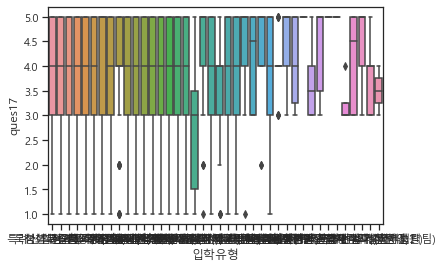

In [46]:
sns.boxplot(x = '입학유형', y = 'ques17', data = df_merge)

__가독성 있는 boxplot을 그리는 법__
- matplotlib.figure 를 이용해 그래프의 크기를 조정한다. 
- x에 들어가는 변수는 가로축에, y로 지정되는 변수는 세로축에 나타난다.  
    (위 예시와 같이 집단명이 긴 경우에 범주형변수를 y로 지정해서 글자가 겹치지 않게 한다)
- 그래프에서 fig는 box안 그림을 지정할 때, ax는 축에 대한 설정을 지정할 때 사용한다
- Boxplot 내의 추가적인 parameter를 이용해 원하는 그래프를 생성한다.
    - color: box의 색깔을 지정
    - palette: 서로 다른 box들의 색깔을 지정
    - saturation: box의 채도를 지정(0~1)
    - width : box의 너비를 변경(1이 옆 boxplot과 딱 맞는 크기)
    - fliersize: 이상치 marker의 사이즈 지정(default는 5)
    - linewidth: boxplot을 그리는 선의 너비 지정 (default는 1)
    - whis: 이상치 분류 범위를 재지정. 이 값을 지정하면 ±1.5 * IQR 밖의 데이터가 아니라 지정된 범위 밖의 데이터가 이상치로 표시됨
    - kwargs: 그래프 설정을 dictionary형태로 입력 받을 수 있음

_참고) seaborn palette의 색_  
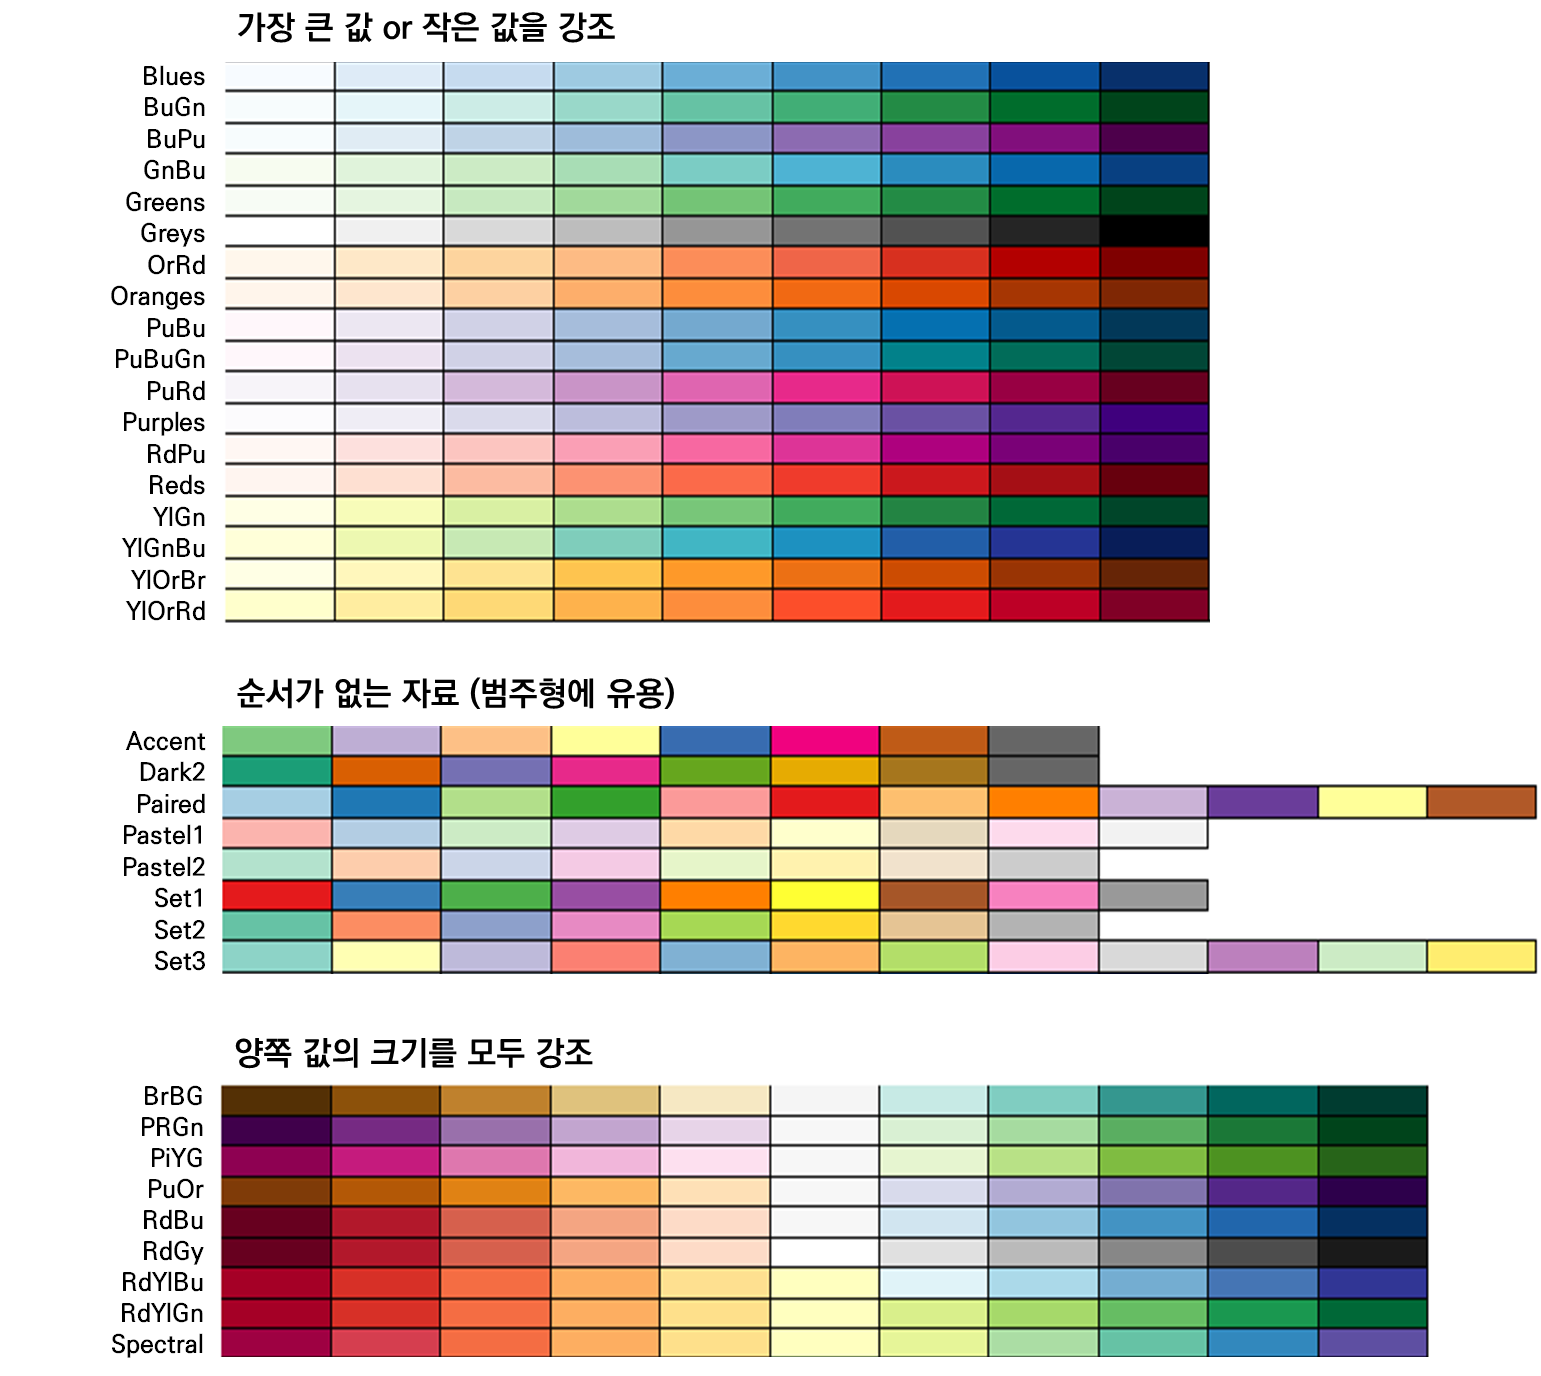

[Text(0, 0.5, '')]

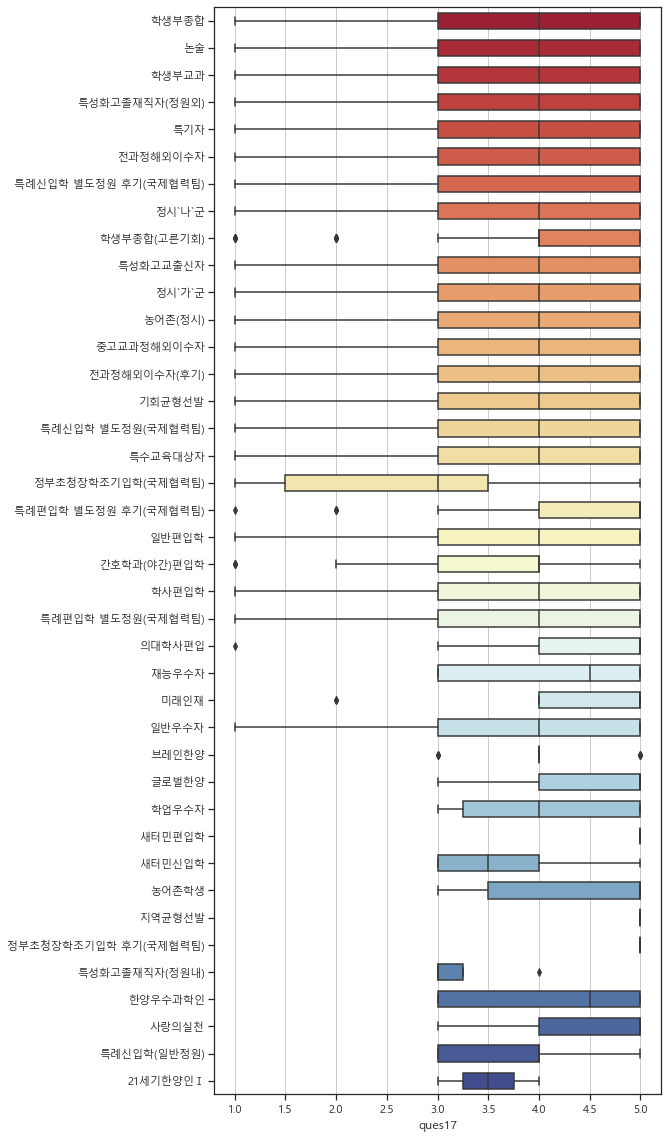

In [73]:
plt.figure(figsize = (8,20))  # figsize = (가로,세로)
ax = sns.boxplot(x = 'ques17', y = '입학유형', data = df_merge, width = 0.6, palette = 'RdYlBu' )

ax.xaxis.grid(True)  ## x에 grid를 추가
ax.set(ylabel = "")  ## y axis의 label을 삭제

plt.show()

### 2. t-Test를 이용한 통계적 검정

In [42]:
from scipy.stats import levene
from scipy.stats import ttest_ind

def ttest(series1, series2):
    statistic,p_value = levene(series1, series2)
    if p_value <=0.05:
        result = ttest_ind(series1, series2, equal_var = False)
        print('등분산성 불만족\nt검정 결과 p_value :', result.pvalue)
    else:
        result = ttest_ind(series1, series2, equal_var = True)
        print('등분산성 만족\nt검정 결과 p_value :', result.pvalue)

In [43]:
## 캠퍼스에 따라 평균에 차이가 있을까?
a = df_merge[df_merge['campusNm']=='ERICA']['ques17']
b = df_merge[df_merge['campusNm']=='서울']['ques17']
ttest(a,b)

등분산성 만족
 t검정 결과 p_value : 0.989325658149645


- p_value의 값이 0.05보다 크거나 같으면, 두 집단 사이에 평균 차이가 존재한다고 말할 수 없다
- p_value의 값이 0.05보다 작으면, 두 집단 사이에 평균 차이가 존재한다

### 3. ANOVA를 이용한 세 집단 이상의 평균차이 검정

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('ques17 ~ C(grade)', df_merge).fit()
print(anova_lm(model, typ = 1))

                  df      sum_sq  mean_sq        F  PR(>F)
C(grade)     4.00000    73.11049 18.27762 17.53469 0.00000
Residual 10186.00000 10617.57070  1.04237      nan     nan


In [48]:
# 등분산성을 만족하지 못할 때 사용
from pingouin import welch_anova
print(welch_anova(data=df_merge, dv='ques17', between='grade'))

  Source  ddof1     ddof2        F   p-unc     np2
0  grade      4 326.18874 18.49238 0.00000 0.00684
